<a href="https://colab.research.google.com/github/SyedSihabUsSakib/Thesis/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(42)
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
# dataset path
# path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/thesis/'

#**SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset from a CSV file
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')

# Preprocessing the dataset
# Your preprocessing steps here

# Split the dataset into training and testing sets
train_data, test_data, train_label, test_label = train_test_split(data['text'], data['label'], test_size=0.2, random_state=95)

# Convert the text data into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer()
train_feature = vectorizer.fit_transform(train_data)
test_feature = vectorizer.transform(test_data)

# Train the SVM model
svm = SVC(kernel='linear')
svm.fit(train_feature, train_label)

# Evaluate the model on the testing set
predictions = svm.predict(test_feature)
print(classification_report(test_label, predictions))


               precision    recall  f1-score   support

   Cy-Flaming       0.47      0.66      0.55       119
Cy-Pull-a-Pig       0.61      0.59      0.60        88
    Cy-Racism       0.74      0.57      0.64       133
    Cy-Threat       0.57      0.52      0.55        96
 Not Bullying       0.71      0.67      0.69       115

     accuracy                           0.60       551
    macro avg       0.62      0.60      0.60       551
 weighted avg       0.62      0.60      0.61       551



#**Confusion Matrix**

[[78 11 14  6 10]
 [26 52  3  3  4]
 [17  7 50 10 12]
 [33  6 12 76  6]
 [13  9  8  8 77]]


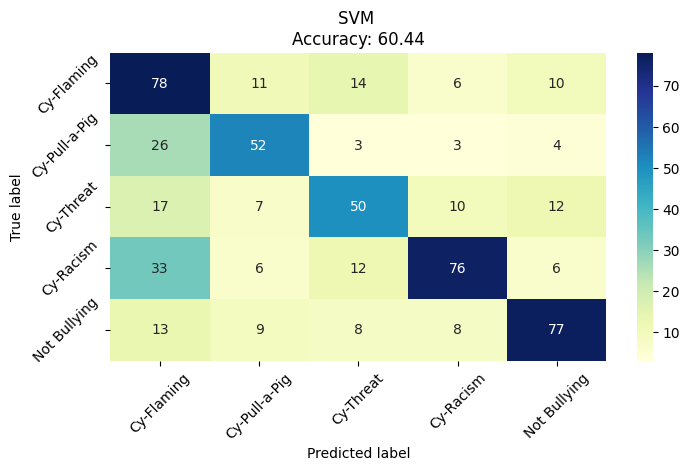

In [ ]:
# Print the classification report and confusion matrix

# print(confusion_matrix(test_label, predictions))
#generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label,predictions, labels=['Cy-Flaming', 'Cy-Pull-a-Pig', 'Cy-Threat', 'Cy-Racism', 'Not Bullying'])
print(cm)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Cy-Flaming' ,'Cy-Pull-a-Pig', 'Cy-Threat','Cy-Racism','Not Bullying'], 
                     columns = ['Cy-Flaming' ,'Cy-Pull-a-Pig', 'Cy-Threat','Cy-Racism','Not Bullying'],)

plt.figure(figsize=(8,4))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
plt.title('SVM \nAccuracy: {0:.2f}'.format(accuracy_score(test_label, predictions)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

#ROC

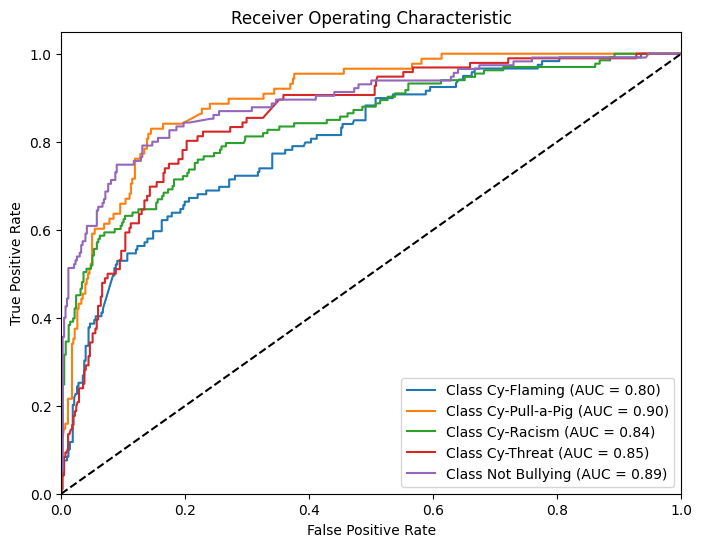

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from a CSV file
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')

# Preprocessing the dataset
# Your preprocessing steps here

# Split the dataset into training and testing sets
train_data, test_data, train_label, test_label = train_test_split(data['text'], data['label'], test_size=0.2, random_state=95)

# Convert the text data into numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer()
train_feature = vectorizer.fit_transform(train_data)
test_feature = vectorizer.transform(test_data)

# Train the SVM model
svm = SVC(kernel='linear', probability=True)
svm.fit(train_feature, train_label)

# Obtain the predicted probabilities for each class
probs = svm.predict_proba(test_feature)

# Calculate the number of classes
num_classes = len(svm.classes_)

# Create an array to store the FPR and TPR for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and AUC for each class
for i in range(num_classes):
    # Prepare the target labels for the current class
    target_label = np.where(test_label == svm.classes_[i], 1, 0)
    
    # Compute the ROC curve and AUC for the current class
    fpr[i], tpr[i], _ = roc_curve(target_label, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='Class %s (AUC = %0.2f)' % (svm.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
